<img src = "images/Callysto_Notebook-Banner_Top.jpg">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex, HTML, clear_output, Markdown
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider, IntSlider, interactive
from traitlets import traitlets
%matplotlib notebook
%matplotlib notebook


#Above, we are importing all the necessary modules in order to run the notebook. 
#Numpy allows us to define arrays of values for our variables to plot them
#matplotlib is what we use to create the figures
#the display and widgets are to make the notebook look neat


In [2]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')




<h1><center> Root Finding </center></h1>
***

![Math_Gif](https://media.giphy.com/media/HcQiwmZtaIrrG/giphy.gif)
***

# Introduction
---
In this notebook you will gain an understanding of basic root-finding algorithms and their implementation. This topic is introduced with the goal of easing you into numerical solutions to mathematical problems. Root finding methods provide a simple means of introducing scientific computing without the need for a deep mathematical background. We will outline the advantages and disadvantages of solving a problem numerically rather than analytically. At the end of the notebook there will be example problems from real-world scenarios, in which you have the opportunity to implement these methods, yielding a broader understanding of their applicability and power.

**Necessary background**:
- Be able to factor quadratic polynomials
- Understand basic python syntax
- Read, graph and analyze functions
- Rudimentary algebra

In this Notebook you will see examples of code to perform some basic root-finding algorithms. You will not be required to know how the code works or need to write any yourself. Nevertheless, you will be encouraged to manipulate some of the lines in order to input a function of your choice, but that is all. The pieces of code and algorithms can be simply thought of as tools to execute the task you want them to perform, and only running them will be a necessary to accomplish this task. Although the coding isn't required, I strongly encourage you to try to understand how and why it works. 


For a warm-up, we have created an exercise for you to determine the intervals on which a polynomial is $>$ 0. A first approach to this problem would be to find the roots of the polynomial and then analyze the behaviour in between these roots. We recommend converting the function into a form that you can graph in order to determine the behaviour on either side of the roots. Think about the possible forms of the graph, i.e. concavity, convexity, and what this tells you about the intervals where the function is positive. This type of analytical thinking will help further along in the notebook. </br>


Given a polynomial of order $\leq$ 3, find where the function $>$ 0. 
Below is simply **a** method of approaching this problem, not necessarily the best or most effective. There are many ways one can go about this, each offering a different insight or understanding. Find what works best for you and try to understand why  you used this method (is it visual? is it solely algebraic? did you manipulate the function?).</br>

**Example**:

Find the interval on which $\rm f(x) = x^2 - 3x +2 > 0$.</br>

Solve for roots:</br>

$\rm f(x) = (x-1)(x-2)$</br>

Pick a point in between each root then evaluate the function at this point in order to analyze the behaviour in between:</br>

$\rm f(0.5) = (0.5)^2 - 3(0.5) + 2 = \frac{1}{4} - \frac{6}{4} + \frac{8}{4} = \frac{3}{4}$ </br>

Therefore the function is positive inbetween the roots.</br>

Answer: x = $(1,2)$</br>

By picking a point in between the roots we quickly found whether the function was concave up or down. Knowing what the graph of a parabola looks like, this quickly told us where the function was positive.

Given a polynomial of order 2 or 3, find where the function $>$ 0. Try polynomials of 2nd order first and then 3rd for more of a challenge. Below, we will provide some algorithms that will make finding the roots of a third (or higher) order polynomial much less tedious. 

- Please input your answer in interval notation, using "U" for the union of intervals 
- For $\infty$ type infinity
- If the function is nowhere $\rm > 0$, then type "Nowhere"

Run the next two cells to try this exercise. I recommend trying the exercise for a polynomial of order two, reviewing the content of the notebook and then trying for polynomials of order 3.

In [4]:
%matplotlib notebook 

def find_interval():
    display(Latex('Provide order of polynomial:'))
    poly_order = int(input())
    check_interval = 0
    
    if poly_order > 3:
        display(Latex('Order of polynomial must be less than or equal to 3'))
        display(Latex('Provide order of polynomial:'))
        poly_order = int(input())
        
    if poly_order == 3:    
        C = np.random.randint(-5,5,poly_order)
        C1 = -1*np.sum(C)
        C2 = C[0]*C[1] + C[2]*(C[0]+C[1])
        C3 = -1*C[0]*C[1]*C[2]
        C11=C1
        C22=C2
        C33=C3
        display(Latex('Find the interval where $P(x) > 0 $ for $P(x)$ as given below:'))
        if C1>0:
            str1 = '+' + str(C11) + 'x^2'
        elif C1== 0:
            str1 = ''
        else:
            str1=  str(C11) + 'x^2'
        if C2>0:
            str2 = '+' + str(C22) + 'x'
        elif C2== 0:
            str2=''
        else:
            str2= str(C22) + 'x'
        if C3>0:
            str3 = '+' + str(C33)
        elif C3== 0:
            str3=''
        else:
            str3= str(C33)
        a = 'P(x)= x^3' + str1 + str2 + str3
        display(Math(a))
        def poly(x):
            return x**3 + C1*x**2 + C2*x + C3
        
    if poly_order == 2:
        C = np.random.randint(-5,5,poly_order)
        C1 = -1*np.sum(C)
        C2 = C[0]*C[1]
        C11=C1
        C22=C2
        if C1>0:
            str1 = '+' + str(C11) + 'x'
        elif C1== 0:
            str1 = ''
        else:
            str1=  str(C11) + 'x'
        if C2>0:
            str2 = '+' + str(C22)
        elif C2== 0:
            str2=''
        else:
            str2= str(C22) 
        display(Latex('Find the interval where $P(x) > 0 $:'))
        a = 'P(x) = x^2 ' + str1 + str2
        display(Math(a))
        def poly(x):
            return x**2 + C1*x + C2
    
    Max = max(C)
    Min = min(C)
    M = [Min, Max]
    V = np.sort(C)
    eps = 0.1
    
    if poly_order ==3:
        v = V[1]
        if Max == Min and poly(Max +eps) > 0:
                          interval = '('+str(Max)+',infinity)' #One single root, increasing
        if Max == Min and poly(Max +eps) < 0:
                          interval = '(-infinity,' + str( Max)+')' #One single root, decreasing
                      
        if poly(Max + eps) >0:
#         interval = '(' + str(Max) + ', infinity)'
            if v !=  Max and v!= Min:
                          interval = '('+str(Min) + ',' + str(v) + ')U(' + str(Max) + ',infinity)'
            if v == Max:
                          interval = '(' + str(Min) + ', infinity)'
            if v== Min:
                          interval = '(' + str(Max) + ', infinity)'
    
        if poly(Max + eps) <0:
#         interval = '(-infinty,' + str(Min) + ')'
            if v != Max and v != Min:
                          interval = '(-inifinity,' + str(Min) + 'U('+str(v) + ','+str(Max) + ')'
            if v == Max:
                          interval = '(-infinity,' + str( Max) + ')'
            if v == Min:
                          interval = '(-infinity,' + str(Min) + ')'
                    
    if poly_order == 2:
            if Max == Min and poly(Max+eps)>0:
                interval = '(-infinity,'+str(Min)+')U('+str(Min)+',infinity)' #one root, convex
            elif poly(Max+eps)<0:
                interval = '('+str(Min)+','+str(Max)+')' #Two distinct roots, Concave
            elif poly(Max + eps)>0:
                interval = '(-infinity,'+str(Min)+')U(' + str(Max)+',infinity)' #Two distinct roots, convex
            else:
                interval = 'Nowhere' #one root, concave   

    print(interval)
    breaker = 0 
    while  check_interval == 0:
        display(Latex('Input answer in interval notation (i.e. (-4,-1)U(5,infinity) ):'))
        interval_input = str(input())
        if interval_input == interval:
            check_interval = 1
            display(Latex("Correct! Here's a visualization of the solution:"))
            x=np.linspace(-100,100,10000)
            y= poly(x)
            plt.figure(figsize=(7,5))
            plt.plot(x,y,'c-')
            plt.xlabel(r'$x$', fontsize = 14)
            plt.ylabel(r'$P(x)$', fontsize = 14)
            plt.grid(True, which='major')
            plt.xlim([-9.5,9.5])
            plt.ylim([-10,10])
            plt.show()
            display(Latex('Above is a graph of the polynomial:'))
            display(Math(a))
            display(Latex('You can pan around the graph by clicking the fourth button (looks like a cross)\
            and dragging the mouse around. You can zoom in to get a better look at the zeros by clicking \
            the white square button, and making a rectangle on the plot where you want a closer look. \
            To reset the graph back to normal, press the "home" button.'))    
        else:
            breaker += 1
            display(Latex("That's not quite right, try again." ))
            if breaker == 4:
                display(Latex("That's not quite right, try again." ))
                display(Latex('Try to plot the graph of the function, to the beahviour as x approaches $\pm \infty$.'))
            elif breaker == 6:
                check_interval = 1
                display(Latex('This was not quite right again, here is visualisation of the solution. \
                Please refer to your course notes to understand why the graph has the shape that it does and how\
                determining the roots would assist you answering the question.'))
                x=np.linspace(-100,100,10000)
                y= poly(x)
                plt.figure(figsize=(7,5))
                plt.plot(x,y,'c-')
                plt.xlabel(r'$x$', fontsize = 14)
                plt.ylabel(r'$P(x)$', fontsize = 14)
                plt.grid(True, which='major')
                plt.xlim([-9.5,9.5])
                plt.ylim([-10,10])
                plt.show()
                display(Latex('Above is a graph of the polynomial:'))
                display(Math(a))
                display(Latex('You can pan around the graph by clicking the fourth button (looks like a cross)\
                and dragging the mouse around. You can zoom in to get a better look at the zeros by clicking \
                the white square button, and making a rectangle on the plot where you want a closer look. \
                To reset the graph back to normal, press the "home" button.'))
                
            continue
        
  
    

    

    

<IPython.core.display.Latex object>

2


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

(-infinity,1)U(3,infinity)


<IPython.core.display.Latex object>

(-infinity,1)U(3,infinity)


<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


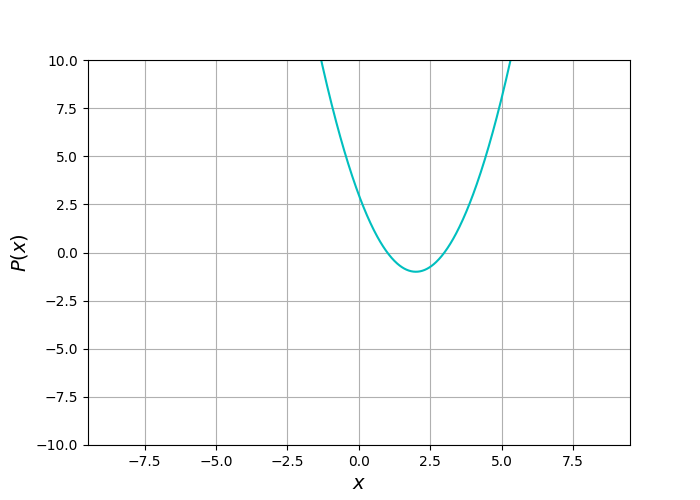

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

In [5]:
try:
    find_interval()
except KeyboardInterrupt:
        pass
        



### Analytic vs. Numerical Solutions
-----------------------------------------------------



   Below we will outline the differences, pros and cons and methods of analytic vs. numerical solutions within the context of root finding. By solving for the roots of the polynomial and analyzing the graph of the function, you were able to explicitly determine an answer to the question posed. This is the benefit of these analytic expressions; they give you a nice and clear explicit answer. It is often the case that we can derive analytic solutions to simpler, well-posed problems. Now, what if the problem is not so well-posed? What if our analytic approach becomes way too complex or tedious? How would you approach this problem without finding zeroes? What if the polynomial is of n-th order? For these cases we turn to a numerical approach, alleviating the work load and attaining the same end goal, but often with less accuracy.


   Next we will walk you through different ways to approach this problem, and more complex problems of the same flavour, numerically. You will gain some insight into the implementation and benefit of numerical solutions while developing some basic skills in Python and numerical analysis.




## Inspection
-----------------------

In order to answer the question, "On what interval(s) is $\rm f(x) > 0?$", you probably found the roots of the polynomial and looked at the behaviour of the graph inbetween these roots. This can be done for nice polynomials with integer coefficients and a low-order, but becomes increasingly difficult the more terms there are and the more nasty the polynomials starts looking. Nevertheless, your initial approach to this problem can still be taken; find the roots, analyze the behaviour in between these roots in order to determine where f(x) $>$ 0. Below we will discuss some algorithms used to determine roots of a polynomial.

Take, for instance, the polynomial:
$\rm f(x) = x^3 -\frac{7}{9}x^2 - \frac{1}{4}x+\frac{7}{36}$


A great advantage of utilizing a numerical approach is that it allows for quick ways to make an approximate solution to a problem. This is useful if the amount of error is negligible and all one is looking for is an estimation. A quick way to get an estimation for our solution in question is simply to plot $f(x)$. The next cell demonstrates the code needed to plot our function. If you want to view this cell, please enable the "Show Code" button at the top of the notebook. For a more extensive documentation and functionality of the matplotlib library see https://matplotlib.org/. For now you can consider this piece of code to be a tool to perform inspection. You can manipulate the domain and the function in the first two lines in order to play around with it and graph a function of your choice. I encourage you to copy and paste this code into another cell and play around with the functionality in order to get more familiar with plotting using matplotlib, but for now it will not be necessary. 

Select the cell and press shift+enter to run the code

In [ ]:
x = np.linspace(-5,5,10000)  #The range of numbers that we think the roots lie within. np.linspace(xmin, xmax, spacing)
f = x**3 - (7/9)*x**2 -(1/4)*x + 7/36  #Our function to be plotted

plt.figure()
hold = True

plt.plot(x,f,'c-')  # np.plot(x,function, a number of different parameters to make the plot look good)
plt.grid() #Use the grid to make estimation
plt.xlabel('x')
plt.xlim([-2,2])
plt.ylim([-1,1])
plt.ylabel('f(x)')
plt.show()



---
Purely by inspection, we were able to observe exactly where the roots of this function lie: $\rm x = -\frac{1}{2},\frac{1}{2},\frac{3}{4}$. This was a nice and clean numerical solution to a problem that would've been much more difficult to solve analytically. Although this may seem convenient and albeit simple, this estimation approach is primitive. It is rare that a problem would ever require this simple of a solution, but nonetheless we found the roots of the polynomial. By simply graphing the solution, we were also able to see easily where the funcition was greater than zero. 

A potential use for this problem would be our initial exercise "Find the intervals where $\rm f(x) > 0$ ". The next cell has been left for you to input the values (a,b,c,d) for a third order polynomial in the form $\rm f(x) = ax^3 + bx^2 + cx + d$ the function that our first exercise output, see if you can use inspection to obtain the correct interval.

---


In [ ]:
# function to graph third order polynomial with given inputs:
%matplotlib notebook
def plot3(a,b,c,d):
    x = np.linspace(-50,50,1000)
    y = a*x**3 + d*x**2 + c*x + d   
    fig = plt.figure(figsize = (8,7))
    ax = fig.add_subplot(1, 1, 1)
    hold = True
    plt.plot(x,y,'b-',linewidth = 2)
    plt.xlabel('x',fontsize = 14)
    plt.ylabel('f(x)',fontsize = 14)
    plt.plot([-15,15],[0,0],'k-',alpha = 1,linewidth = 1)
    plt.plot([0,0],[-15,15],'k-',alpha = 1,linewidth = 1)
    plt.xticks(np.arange(-15,16,step = 1), rotation = 'vertical')
    plt.yticks(np.arange(-15,16,step =1))
    ax.grid(which='both')
    plt.ylim([-15,15])
    plt.xlim([-15,15])
    plt.legend(loc = 'best', fontsize = 18)
    plt.show()
    return 

abc = interactive(plot3, a = widgets.BoundedFloatText(value=1, min=-10,max=10,step=1.0,description='a:',disabled=False),
    b = widgets.BoundedFloatText(value=1,min=-10, max=10,step=1.0,description='b:',disabled=False),
    c = widgets.BoundedFloatText(value=1,min=-10,max=10,step=1.0,description='c:',disabled=False),
    d = widgets.BoundedFloatText(value=1,min=-10,max=10,step=1.0,description='d:',disabled=False))

display(abc)


---
Here we will provide an exercise to determine roots of a function based on arbitrary parameters and visualize how a graph of the function changes under changes in the values of these parameters. </br>
Learning outcomes:
- You will understand how arbitrary parameters change the graph of a quadratic polynomial function
- Understand how to determine the roots given arbitrary values
- See how the roots change under changing the values of the parameter

First we provide the steps to derive the famous "Quadratic Formula", try following them on your own, click **Show Answer** to see the answer. 

Starting with an arbitrary polynomial, $\rm P(x) = ax^2 + bx + c$:

1. Set P(x)=0 
2. Complete the square
3. Rearrange the equation, isolating "x"
---


In [6]:
button = widgets.Button(description="Show Answer")
display(button)

def on_button_clicked(b):
    display(Markdown('$\\rm P(x) = ax^2 + bx + c = 0$ </br> </br> \
    Complete the square, first dividing by a:</br> </br> \
    $\\rm P(x) = (x+\\frac{b}{2a})^2 + \\frac{c}{a} - \\frac{b^2}{4a}= 0$ </br> </br>\
    Rearrange for $x$: </br> </br> \
    $\\rm (x+\\frac{b}{2a})^2 = \\frac{b^2}{4a^2} -\\frac{c}{a} = \\frac{b^2 - 4ac}{4a^2}$ \
    $\\rm \Rightarrow x+\\frac{b}{2a} = \pm \\frac{\sqrt{b^2-4ac}}{\sqrt{4a^2}}$ </br> \
    $\\rm \Rightarrow x = -\\frac{b}{2a} \pm \\frac{\sqrt{b^2-4ac}}{2a}$'))
    button_clicked = 1
button.on_click(on_button_clicked)
    
    


Button(description='Show Answer', style=ButtonStyle())

$\rm P(x) = ax^2 + bx + c = 0$ </br> </br>     Complete the square, first dividing by a:</br> </br>     $\rm P(x) = (x+\frac{b}{2a})^2 + \frac{c}{a} - \frac{b^2}{4a}= 0$ </br> </br>    Rearrange for $x$: </br> </br>     $\rm (x+\frac{b}{2a})^2 = \frac{b^2}{4a^2} -\frac{c}{a} = \frac{b^2 - 4ac}{4a^2}$     $\rm \Rightarrow x+\frac{b}{2a} = \pm \frac{\sqrt{b^2-4ac}}{\sqrt{4a^2}}$ </br>     $\rm \Rightarrow x = -\frac{b}{2a} \pm \frac{\sqrt{b^2-4ac}}{2a}$

***
We will now analyze the graph of the function $\rm P(x) = ax^2 + bx + c$ under changing the paramters a,b,c. In the next cell you can manipulate the sliders in order to change these parameters of the function, I recommend thinking about how changing these parameters affects the roots given by the quadratic formula. i.e. How does the form of the function $\rm P(x)$ affect the position of the roots? Please press shift+enter to run the next cell in order to see how changing these parameters affects the position of the roots. Think how they change x in the quadratic formula.
***

In [7]:
%matplotlib notebook
def plotP(a,b,c):
    if a!=0:
        x1 = -b/(2*a) + ((b**2-4*a*c)**(1/2))/(2*a)
        x2 = -b/(2*a) - ((b**2-4*a*c)**(1/2))/(2*a)
        plt.figure(figsize = (7,5))
        hold = True
        plt.plot(x1,0,'bo',linewidth = 2)
        plt.plot(x2,0,'ro',linewidth = 2)
        plt.xlabel('x',fontsize = 14)
        plt.ylabel('y',fontsize = 14)
        plt.plot([-15,15],[0,0],'k-',alpha = 1,linewidth = 1)
        plt.plot([0,0],[-15,15],'k-',alpha = 1,linewidth = 1)
        plt.grid(alpha = 0.7)
        plt.xticks(np.arange(-15,16,step=1),rotation = 'vertical')
        plt.yticks(np.arange(-15,16,step=1))
        plt.ylim([-15,15])
        plt.xlim([-15,15])
        plt.legend(loc = 'best', fontsize = 18)
        plt.show()
        
    if a ==0 and b!= 0:
        x1 = -c/b
        plt.figure(figsize = (7,5))
        hold = True
        plt.plot(x1,0,'bo',linewidth = 2)
        plt.xlabel('x',fontsize = 14)
        plt.ylabel('y',fontsize = 14)
        plt.plot([-15,15],[0,0],'k-',alpha = 1,linewidth = 1)
        plt.plot([0,0],[-15,15],'k-',alpha = 1,linewidth = 1)
        plt.grid(alpha = 0.7)
        plt.xticks(np.arange(-15,16,step=1),rotation = 'vertical')
        plt.yticks(np.arange(-15,16,step=1))
        plt.ylim([-15,15])
        plt.xlim([-15,15])
        plt.legend(loc = 'best', fontsize = 18)
        plt.show()
    if a==0 and b == 0:  
        plt.figure(figsize = (7,5))
        hold = True
        plt.xlabel('x',fontsize = 14)
        plt.ylabel('y',fontsize = 14)
        plt.plot([-15,15],[0,0],'k-',alpha = 1,linewidth = 1)
        plt.plot([0,0],[-15,15],'k-',alpha = 1,linewidth = 1)
        plt.grid(alpha = 0.7)
        plt.xticks(np.arange(-15,16,step=1),rotation = 'vertical')
        plt.yticks(np.arange(-15,16,step=1))
        plt.ylim([-15,15])
        plt.xlim([-15,15])
        plt.legend(loc = 'best', fontsize = 18)
        plt.show()
    return 

slider = interactive(plotP, a = (-10,10,1), b = (-10,10,1), c = (-10,10,1))


display(slider)


interactive(children=(IntSlider(value=0, description='a', max=10, min=-10), IntSlider(value=0, description='b', max=10, min=-10), IntSlider(value=0, description='c', max=10, min=-10), Output()), _dom_classes=('widget-interact',))

# Bisection Method
---

The bisection method is a simple algorithm to quickly find an approximation for a root. The basic idea of the method is to initially take an interval, $\rm [a,b]$ on which the function is defined, such that $\rm f(a),f(b)$ have different signs (so you know there is a root in between). We then split the interval in two and check the new endpoints of each subinterval. Let $\rm c = (a+b)/2$ be the midpoint of the interval. If one of the subintervals has endpoints which have the same signs,i.e. if $\rm f(a)$ & $\rm f(c)$ or $\rm f(b)$ & $\rm f(c)$ have the same signs then this interval is discarded and the root is found in between the other interval. We then divide this sub-interval into two and perform the same analysis. Eventually, up to an accuracy we are happy with, we will have a small interval where we know a root is found. 

Try this method, analytically, for $\rm f(x)= x^2-4$ and the initial interval $\rm [0,5]$. Try three iterations of the algorithm, and see the accuracy you obtain, would you be happy with this accuracy? Do you feel this was quick enough? Click "Show Answer" to see the calculations, after you have done so yourself of course...



In [8]:
button = widgets.Button(description="Show Answer")
display(button)

def on_button_clicked(b):
    display(Markdown('Firstly, $\\rm f(0) = -4$ and $\\rm f(5) = 21$, which have opposite signs, so this is a valid interval to start with. </br> </br> \
    Split the interval in two: $\\rm c_1 = \\frac{0+5}{2} = 2.5$. </br> </br> \
    Check the sign of the function for on each subinterval endpoint (i.e. check the sign of $\\rm f(c)$):  $\\rm f(2.5) = 2.25$, therefore our new interval is $\\rm [0,2.5]$.</br> </br> \
    Split interval again and check signs of function at the middle: $\\rm c_2 = \\frac{2.5+0}{2} = 1.75$ , $\\rm f(1.75) = -0.9375$ </br> </br> \
    $\Rightarrow$ new interval is $\\rm [1.75,2.5]$, $\\rm c_3 = \\frac{1.75+2.5}{2}$, $\\rm f(c_3) = 0.515625$, new interval = $\\rm [1.75,2.125]$ </br> </br> \
    root is approximately $\\rm c_4 = \\frac{1.75 + 2.125}{2} = 1.9375$ </br> </br> \
    Percent error: $\\rm \\frac{2-1.9375}{2} x 100\% = 3.125 \%$'))
    button_clicked = 1
button.on_click(on_button_clicked)

    
    


Button(description='Show Answer', style=ButtonStyle())

Firstly, $\rm f(0) = -4$ and $\rm f(5) = 21$, which have opposite signs, so this is a valid interval to start with. </br> </br>     Split the interval in two: $\rm c_1 = \frac{0+5}{2} = 2.5$. </br> </br>     Check the sign of the function for on each subinterval endpoint (i.e. check the sign of $\rm f(c)$):  $\rm f(2.5) = 2.25$, therefore our new interval is $\rm [0,2.5]$.</br> </br>     Split interval again and check signs of function at the middle: $\rm c_2 = \frac{2.5+0}{2} = 1.75$ , $\rm f(1.75) = -0.9375$ </br> </br>     $\Rightarrow$ new interval is $\rm [1.75,2.5]$, $\rm c_3 = \frac{1.75+2.5}{2}$, $\rm f(c_3) = 0.515625$, new interval = $\rm [1.75,2.125]$ </br> </br>     root is approximately $\rm c_4 = \frac{1.75 + 2.125}{2} = 1.9375$ </br> </br>     Percent error: $\rm \frac{2-1.9375}{2} x 100\% = 3.125 \%$

***
We can clearly see that the method is somewhat slow and really good accuracy is hard to achieve. Nevertheless, it narrowed down our intervals and gave us a fairly good approximation to the root. What about the other root at $\rm x = -2$, how could we have obtained this root? Well, with a different set of initial conditions (our initial interval). Try this same procedure, now instead with $\rm [-5,0]$ as your starting point. Your answer after each iteration should be the same, except with a different sign. 

This serves to illustrate a flaw in a lot of root finding algorithms; the sensitivity to initial conditions. Lots of these algorithms require an educated 'guess' in order for the algorithm to work properly. In this case, the algorithm can only tell us one root for each initial guess, which presents itself as another downside. 

The next cell is an illustration of how one could write a piece of code to execute this algorithm. You will have to click on the "show code" at the top of the notebook to see the code. Press Shift+Enter on the selected cell to run the code. I encourage you to manipulate the first line to test out the algorithm for a function of your choice. The code will tell you a root in between the initial conditions you set. The default initial conditions are $\rm x_0 = -1, x_1 = 1$
***

In [ ]:
#Bisection Method algorithm


#Specify the initial interval
x0 = -1
x1 = 1

#Specify how many iterations and tolerance (accuracy) you want to run through:
n = 100 
tol = 0.001
    
#Function (of your choice) we will use our function from before:
def f(x):
    return x**3 - (7/9)*x**2 -(1/4)*x + 7/36 
#Defining a sign function
def sign(x):
    if x < 0:
        sign = 0
    if x >= 0:
        sign = 1
    return sign        

#Bisection method algorithm
c = (x1+x0)/2
m = 0
if f(x0) > 0 and f(x1) > 0 or f(x0) < 0 and f(x1) < 0: 
    print('Pick new initial conditions') #The Bisection method does not apply for these cases
else:
    for i in range(1,n):
        c = (x1+x0)/2
        if f(c) == 0:
            root = c   # you have found the root exactly
        if sign(f(c)) == sign(f(x0)):
            x0 = c #Interval with x0 does not have root, x0 becomes c
        if sign(f(c))== sign(f(x1)):
            x1 = c #Interval with x1 does not have root, x1 becomes c
        root = (x1+x0)/2
    display(Latex('$\\rm Root =  $' + str(round(root,4))))

# Secant Method
____

Here we will walk you through a root-finding algorithm known as the "Secant Method", which provides quick approximations of roots. For a quick review or another reference of this method and other root finding algorithms, please see https://en.wikipedia.org/wiki/Root-finding_algorithm. 

In this section of the tutorial we will demonstrate the basics of the method and walk you through some of the elementary steps you would need to write a root-finding algorithm implementing the secant method yourself. 

## Analytical approach
---
The Secant method employs succesive operations, known as iterations, of finding the root of a *secant line* of a function $\rm f(x)$.  

A secant line can thought of as a line which intersects a curve at two points. Given the domain $[a,b]$ and a continuous function $\rm f:[a,b] \mapsto R$, take two points $\rm x_0, x_1 \in [a,b]$. The secant line between these two points, in slope-intercept form is given as:


\begin{equation}
s(x) = \frac{f(x_1)-f(x_0)}{x_1-x_0}(x-x_1) + f(x_1)
\end{equation}

The next step in the algorithm is to find the root of this line:

\begin{equation}
\begin{split}
s(x) &= 0 = \frac{f(x_1)-f(x_0)}{x_1-x_0}(x-x_1) + f(x_1)
\\& \Rightarrow x = x_1 - f(x_1)\frac{x_1-x_0}{f(x_1)-f(x_0)}
\end{split}
\end{equation}

This point now becomes our next endpoint, i.e.:

\begin{equation}
x_2 = x_1 - f(x_1)\frac{x_1-x_0}{f(x_1)-f(x_0)}
\end{equation}

We now *iterate* this algorithm, applying the same process successively, until our algorithm yields a value $f(x_n) \approx 0$ after *n* iterations.

\begin{equation}
\begin{split}
& x_3 = x_2 - f(x_2)\frac{x_2-x_1}{f(x_2)-f(x_1)}
\\& x_4 = x_3 - f(x_3)\frac{x_3-x_2}{f(x_3)-f(x_2)}
\\& .
\\& .
\\& .
\\& x_n = x_{n-1} - f(x_{n-1}) \frac{x_{n-1}-x_{n-2}}{f(x_{n-1})-f(x_{n-2})}
\end{split}
\end{equation}

Firstly, we will visualize this approach, and then discuss it's numerical implementation and pitfalls. Upon running the next cell you will be asked to input the initial values of $\rm x_0, x_1$ and press "Next" to see how the algorithm searches for the roots of the same function used in the "Inspection" example. This will give you a sense how this algorithm works and the problems it may run into. Reset the cell by running it again and playing around with different initial conditions to gain a better sense of how the algorithm works. Does it seem faster than the bisection method? How many iterations until it converged to the solution?

Try working through the algorithm analytically, on paper with a function of your choice, beforehand. See how fast you can obtain a root and to what accuracy.




<IPython.core.display.Latex object>

-1


<IPython.core.display.Latex object>

3


<IPython.core.display.Latex object>

0.001


LoadedButton(description='Next', style=ButtonStyle())

<IPython.core.display.Javascript object>


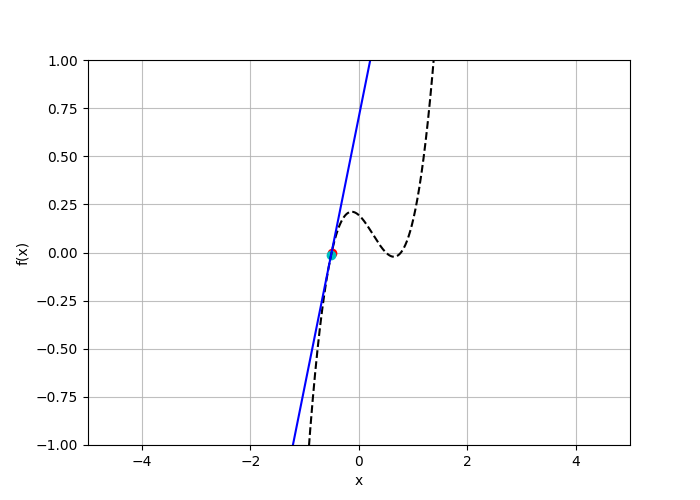

In [10]:
# Secant method visualization
#First we define our arbitrary function
%matplotlib notebook
x = np.linspace(-10,10,10000)
f = x**3 - (7/9)*x**2 -(1/4)*x + 7/36 #Underlying plot
def func(x):     
    return x**3 - (7/9)*x**2 -(1/4)*x + 7/36  #Function to employ algorithm on

class LoadedButton(widgets.Button):
    #A button that can holds a value as a attribute.

    def __init__(self, value=None, *args, **kwargs):
        super(LoadedButton, self).__init__(*args, **kwargs)
        # Create the value attribute.
        self.add_traits(value=traitlets.Any(value))




def secantmethod(x0,x1,n,tol):
#"Next" button will provide a counter which will specify the number of iterations through the loop.

    plt.figure(6,figsize = (7,5))
    hold = True
    if abs(x1-x0)< tol:
        display(Latex('Root = '+ str(round(x1,4))))
        display(Latex("Bisection method has provided the root to within the specified tolerance"))
    else:
        for i in range (1,n):
            secant = ((func(x1)-func(x0))/(x1-x0))*(x-x1) + func(x1)
            x2 = x1-func(x1)*((x1-x0)/(func(x1)-func(x0)))
            x0 = x1
            x1 = x2
            if abs(x1-x0)< tol:
                display(Latex('Root = '+ str(round(x1,4))))
                display(Latex("Bisection method has provided the root to within the specified tolerance"))
                break
                
        plt.clf()
        plt.plot(x1,func(x1),'ro')
        plt.plot(x0,func(x0),'co')   
        plt.plot(x,f,'k--')
        plt.plot(x,secant,'b-')
        plt.grid(alpha = 0.8)          
        plt.xlabel('x')
        plt.xlim([-5,5])
        plt.ylim([-1,1])
        plt.ylabel('f(x)')
        plt.show()

    
def add_num(n):
    n.value = n.value + 1
    secantmethod(x0,x1,n.value,tol)



display(Latex('Input a value for $x_0$'))
x0 = float(input())
display(Latex("Input a value for $x_1$"))
x1 = float(input())
display(Latex("Specify an accuracy"))
tol = float(input())
lb = LoadedButton(description="Next", value=1)
lb.on_click(add_num)
display(lb)


    
    
    

# Transcendental equations
---

A nice application of root finding occurs when one is faced with a transcendental equation. Below we will walk you through how to solve these equations numerically using the methods we have previously discussed.

**Transcendental equation** </br>

A transcendental equation is defined as an equation which contains a transcendental function of the variable being solved for. 

Examples:
- $\rm x = e^x$
- $\rm tan(x) = x$
- $\rm ln(x) = e^x$

These equations may look intimidating, but by formulating their solution as a root finding problem and applying the methods we learned in this notebook, they become solvable. Developing these tools and being exposed to these types of problems will aid you if you are ever faced with an equation of this type in the future. 

Firstly, we illustrate how to use these techniques to solve the problem $\rm sin(x) = x$ and then provide some practive problems where you get the opportunity to manipulate the code from our example.

***
**Problem Statement**

Find all solutions of the equation: $\rm cos(x) = x$

Firstly, the problem can be formulated as: find the roots of $\rm cos(x) - x$ (Why are these equivalent?). Let's first apply Inspection in order to get a sense of what this function looks like and where it may have roots/solutions. The next cell plots the function on a grid so we can visually "inspect" where the root is approximately. Use the interactivity function 'zoom' to see where the function crosses the x-axis more precisely. (You will need to enable the show code button to see and run this cell).


<IPython.core.display.Javascript object>


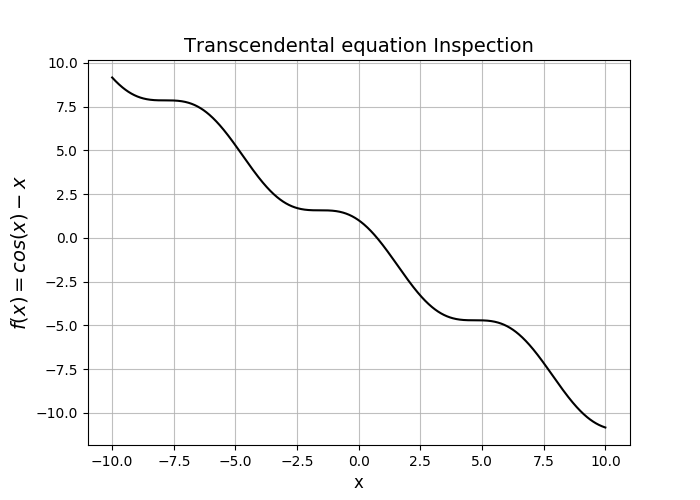

In [11]:
%matplotlib notebook

x = np.linspace(-10,10,1000) # You may have to change this range to see more of the graph if necessary 
f = np.cos(x)-x    #You can copy and paste this code and manipulate this line for other transcendental equations

plt.figure(figsize = (7,5))
plt.plot(x,f,'k-')
plt.grid(alpha = 0.8)
plt.xlabel('x',fontsize = 12)
plt.ylabel('$f(x) = cos(x)-x$', fontsize = 14)
plt.title('Transcendental equation Inspection', fontsize = 14)
plt.show()





***
We can see via inspection that the root is $x \approx 0.75$. As we can see this method is effective for our purposes, especially when you can zoom into the root. But, what if you're writing an algorithm in which this value is passed to another part of the algorithm? Then one must use one of the other methods to find the root. In the next cell we will locate the value of the root using the bisection method.
***

In [12]:
#Another copy of the bisection method algorithm
#Specify the initial interval
x0 = -1
x1 = 1

#Specify how many iterations and tolerance (accuracy) you want to run through:
n = 100 
tol = 0.001
    
#Function (of your choice) we will use our function from before:
#Change this return statement for other functions of your choice.  
def f(x):
    return np.cos(x)-x 


#Defining a sign function
def sign(x):  #in order that the function accepts an input
    if x < 0:
        sign = 0
    if x >= 0:
        sign = 1
    return sign # the function returns either a one, if the input if positive, and a 0 if the function it is negative.      

#Bisection method algorithm
c = (x1+x0)/2  #First define the formula for subdiving our interval

if f(x0) > 0 and f(x1) > 0 or f(x0) < 0 and f(x1) < 0: 
    print('Pick new initial conditions') #The Bisection method does not apply for theses two cases (as previously discussed)
else:
    for i in range(1,n):
        c = (x1+x0)/2
        if f(c) == 0:
            root = c   # you have found the root exactly
        if sign(f(c)) == sign(f(x0)):
            x0 = c #Interval with x0 does not have root, x0 becomes c. Think about why this is the case.
        if sign(f(c))== sign(f(x1)):
            x1 = c #Interval with x1 does not have root, x1 becomes c. Think about why this is the case.
        root = (x1+x0)/2
    display(Latex('Root = ' +str(round(root,4))))





<IPython.core.display.Latex object>

### Analysis
---
Our Bisection method algorithm gave us a nice and precise value of the root, this value could be passed into another function. Due to this reason, and the fact that the function need not be plotted, the Bisection Method is more robust and more applicable. 

What do you think? Would you rather just see a graph of the function and compromise on accuracy? 
Below we will outline a clear disadvantage of the bisection method.

Let's now try the same problem for $\rm tan(x) = x$:

- If we run the algorithm above for the function $\tan(x)-x$, with the initial conditions $\rm x_0 = -1, x_1 = 1$, we obtain the     answer: $x = 0$.

- If again we run the algorithm with the initial conditions $\rm x_0 = 1, x_1 = 3$, 
  we obtain the answer: $\rm x = 1.5708$

Why is this the case?
Let's plot this function to inspect the cause of this.
Run the cell below to see a plot of the function $\rm f(x) = tan(x)-x$


<IPython.core.display.Javascript object>


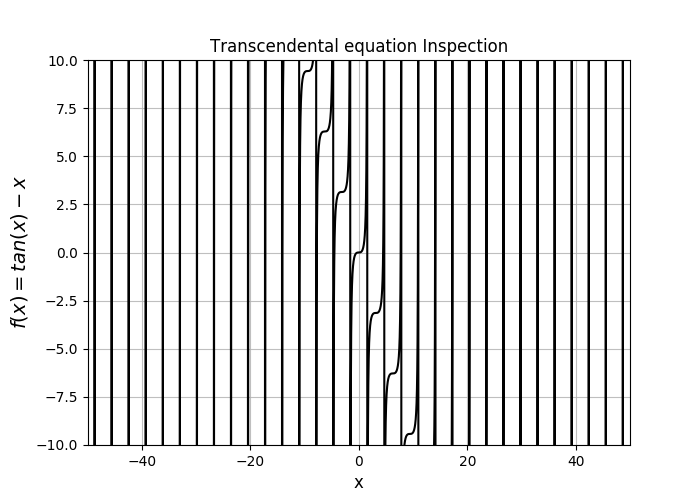

In [14]:
%matplotlib notebook

x = np.linspace(-50,50,10000) # Notice we changes the range of x-values, in order to visualize the solution better
f = np.tan(x)-x    

plt.figure(figsize = (7,5))
plt.plot(x,f,'k-')
plt.grid(alpha = 0.8)
plt.xlabel('x',fontsize = 12)
plt.xlim([-50,50])
plt.ylim([-10,10])  # We impose this to get a better visual representation of the solution. 
                    # Try without this limiting factor on to see the difference                        
plt.ylabel('$f(x) = tan(x)-x$', fontsize = 14)
plt.title('Transcendental equation Inspection')
plt.show()


### Analysis
---
We see that this function crosses the x-axis many times, actually infinitely many times (if we were to extend the plot). Our Bisection Method algorithm can only narrow down on one root at a time. With appropriate guesses for the initial conditions, we would be able to obtain all roots (in theory) but this would be a tedious task. It took a combination of these methods to recognize that there were multiple solutions and obtain their exact values. 


### Practice Problems
---

I strongly encourage you to try out the algorithms in order to solve the first exercise in this notebook for second and third order polynomials for extra practice. The answers are all integer values so you do not need to worry about accuracy too much. Additionally, consider these transcendental equations. You may run into some problems (technical and theoretical) solving them, this is OK and all part of the learning process. The next few cells are left blank for you to copy and paste the code we have been using and manipulate it for yourself.

Find all solutions of:

1. $\rm ln(x) = x-5$  (think about the domain of definition of ln(x))
2. $\rm cos(x) = x/4$ (plot the function)
3. $\rm sin(x) = x-1$ (Try this one with the secant method for fun)
4. $\rm cos(x) = x^2$
5. $\rm ln(x) = cos(x)$ 

# Conclusion
---

In this Jupyter Notebook you learned the basics of root-finding algorithms. Namely, we studied the process of finding and approximating the roots of a function by Inspection, the Bisection Method,and the Secant Method. Equally as important, you gained some experience and exposure (if you haven't seen some already) to scientific computing. 

Additionally, we applied our methods within the context of solving transcendental equations. It is likely that this is the first time you have been exposed to transcendental equations and the methods we have discussed here. Hopefully, working through the notebook helped you understand the different ways in which one can break down a problem like this. Which did you like best? Being able to adapt and apply the mathematical tools that you have acquired in class is an invaluable skill to have. These skills often end up transferring to general problem-solving skills. I encourage you to reflect upon which of the methods you enjoyed and why. It will offer insight into your own personal learning process.


<img src = "images/Callysto_Notebook-Banners_Bottom.jpg">